# Intro a Scikit Learn

La librería `scikit-learn` es una de las librerías más populares para Machine Learning en Python. Esta librería es muy completa y tiene una gran cantidad de algoritmos de Machine Learning implementados, así como herramientas para preprocesamiento de datos, evaluación de modelos, etc.

![scikit-learn](https://hkalabs.com/wp-content/uploads/2018/07/scikitLearn-2.png)

## 1. Instalación

De nuevo, usamos `pip` para instalar la librería:

```bash
pip install scikit-learn==<version>
```

⚠️ fíjate que la importación de la librería es `sklearn` y no `scikit-learn`.

In [1]:
import sklearn

## 2. Cargar los datos

Cómo hemos visto anteriormente, este paso lo cubriremos haciendo uso de la librería `pandas`. Podemos traernos los datos desde una BBDD, un archivo CSV, etc. Para este ejemplo, vamos a usar el dataset de titanic que ya hemos visto en la clase anterior.

In [2]:
import pandas as pd

CSV_PATH = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

titanic_df = pd.read_csv(CSV_PATH)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Exploración de los datos

En este paso, vamos a hacer un análisis exploratorio de los datos. Vamos a ver si hay valores nulos, vamos a ver la distribución de las variables, etc.

### 3.1 Correlación entre variables

Una de las cosas que podemos hacer es ver la correlación entre las variables. Esto nos puede dar una idea de qué variables están más relacionadas entre sí. La correlación es un valor entre -1 y 1. Si es 1, significa que las variables aumentan juntas. Si es -1, significa que una variable disminuye cuando la otra aumenta. Si es 0, significa que no hay relación entre las variables.

Text(0.5, 1.0, 'Titanic Numeric Variables Correlation')

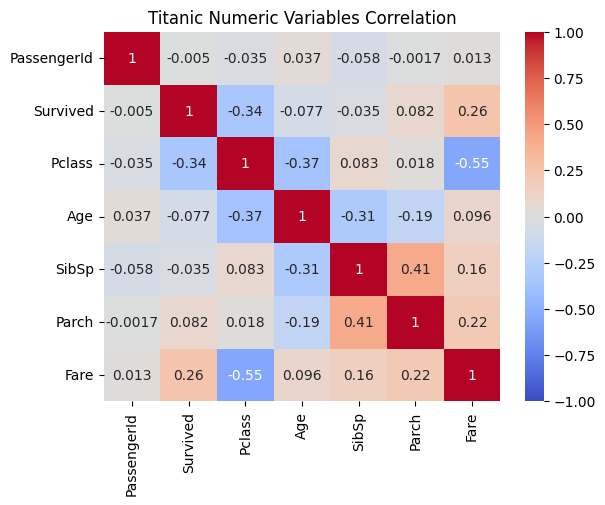

In [4]:
import seaborn as sns


titanic_correlation = titanic_df.corr(numeric_only=True)
ax = sns.heatmap(
    titanic_correlation,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
)
ax.set_title('Titanic Numeric Variables Correlation')

### 3.2 Ratio de Supervivencia

Vamos a ver qué ratio de supervivencia existe en función a algunas variables. Por ejemplo, de la edad o el sexo.

Text(0.5, 1.0, 'Survival distribution by Age')

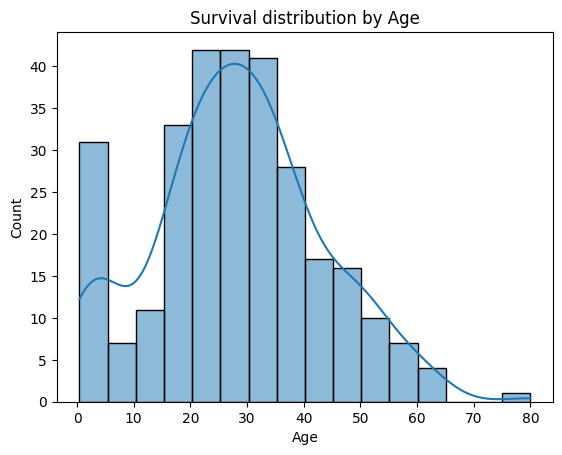

In [5]:
survived_filter = titanic_df['Survived'] == 1
survived_age = titanic_df[survived_filter]["Age"]
ax = sns.histplot(survived_age, kde=True)
ax.set_title('Survival distribution by Age')


Text(0.5, 1.0, 'Survival rate by Sex')

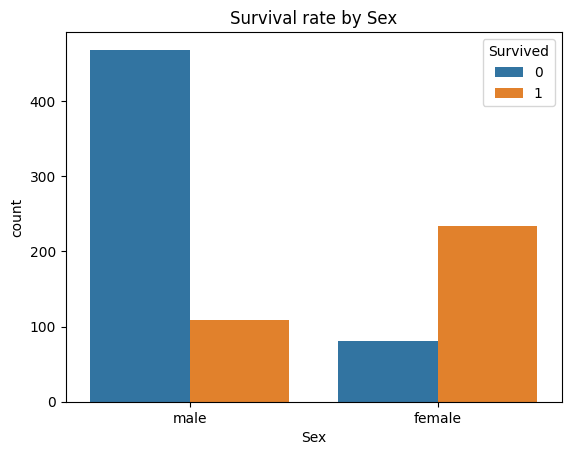

In [6]:
ax = sns.countplot(titanic_df, x="Sex", hue="Survived")
ax.set_title('Survival rate by Sex')

## 3. Preprocesamiento de datos

En este paso, vamos a hacer un preprocesamiento de los datos. Esto puede incluir la eliminación de valores nulos, la codificación de variables categóricas, la normalización de los datos, etc.

### 3.1 Eliminar valores innecesarios

Recuerdalo siempre: la calidad de tu modelo nunca será mejor que la calidad de tus datos. Por tanto, es muy importante preprocesar los datos antes de entrenar un modelo. Imaginemos que tras hacer un análisis exploratorio de los datos, hemos visto que hay variables que no aportan información relevante. En este caso, podemos eliminarlas. Por simplificar el ejemplo, vamos a eliminar las columnas `PassengerId`, `Name`, `Ticket`, `Cabin`, `Fare`, `Parch`  (número de padres/hijos a bordo) y `SibSp` (número de hermanos/cónyuges a bordo).

In [7]:
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Parch', 'SibSp', 'Fare'], axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


### 3.2 Eliminar valores nulos

Vamos a ver primero qué campos tienen valores nulos

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


Vemos que todos los campos están completos salvo para `Age`.

In [9]:
mean_age = titanic_df["Age"].mean()
titanic_df["Age"] = titanic_df["Age"].fillna(mean_age)

In [10]:
embarked_mode = titanic_df["Embarked"].mode()[0]  # mode() returns a Series
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(embarked_mode)

### 3.3 Convertir variables categóricas a numéricas

En este caso, vamos a convertir las variables categóricas (tipo `object`) a numéricas (tipo `int`). `scikit-learn` tiene una serie de herramientas para preprocesar los datos, como por ejemplo `LabelEncoder`, para codificar etiquetas.

In [11]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
label_encoder.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

Ahora podemos convertir las variables categóricas a numéricas.

In [12]:
label_encoder.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

Y a la inversa, de numéricas a categóricas, también

In [13]:
label_encoder.inverse_transform([2, 2, 1])

array(['tokyo', 'tokyo', 'paris'], dtype='<U9')

Procedemos a convertir la variable `Sex` a numérica. Usamos `fit_transform` para ajustar el codificador y transformar la variable al mismo tiempo.

In [14]:
label_encoder_sex = LabelEncoder()
titanic_df["Sex"] = label_encoder_sex.fit_transform(titanic_df["Sex"])
titanic_df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,S
1,1,1,0,38.0,C
2,1,3,0,26.0,S
3,1,1,0,35.0,S
4,0,3,1,35.0,S


In [15]:
label_encoder_sex = LabelEncoder()
titanic_df["Embarked"] = label_encoder_sex.fit_transform(titanic_df["Embarked"])
titanic_df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,2
1,1,1,0,38.0,0
2,1,3,0,26.0,2
3,1,1,0,35.0,2
4,0,3,1,35.0,2


### 3.4 Normalización de los datos

La normalización de los datos es un paso importante en el preprocesamiento de los datos. La normalización de los datos es el proceso de **escalar los datos a un rango fijo**. Hay diferentes técnicas para normalizar los datos, como por ejemplo la normalización `MinMax`, consistente en escalar los datos al rango [0, 1]. `scikit-learn` tiene una clase llamada `MinMaxScaler` que nos permite hacer esto.

Hacemos lo mismo con la edad.

In [16]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler_age = MinMaxScaler()
titanic_df["Age"] = min_max_scaler_age.fit_transform(titanic_df[["Age"]])
titanic_df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,0.271174,2
1,1,1,0,0.472229,0
2,1,3,0,0.321438,2
3,1,1,0,0.434531,2
4,0,3,1,0.434531,2


## 4. Dividir los datos en entrenamiento y test

La división de los datos en entrenamiento y test es un paso importante en Machine Learning. La idea es entrenar el modelo con una parte de los datos y evaluarlo con otra parte. `scikit-learn` tiene una función llamada `train_test_split` que nos permite hacer esto.

Primero, debemos separar la variable dependiente, también conocida como variable objetivo, de las variables independientes. Las variables independientes son aquellas que se utilizan para predecir la variable dependiente. En este caso, la variable dependiente es `Survived` y las variables independientes son el resto de variables.

In [17]:
from sklearn.model_selection import train_test_split


TEST_SIZE = 0.2
RANDOM_STATE = 42


X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Entrenar el modelo

La primera pregunta que debemos hacernos es: ¿qué algoritmo de Machine Learning vamos a usar? En este caso, nuestro objetivo es predecir si un pasajero del Titanic sobrevivió o no. **Este es un problema de clasificación binaria**, por lo que podemos **usar algoritmos de clasificación** como la Regresión Logística, Árboles de Decisión, Random Forest, etc. En este caso, **vamos a usar la Regresión Logística** que `scikit-learn` tiene implementada en la clase `LogisticRegression`.

In [18]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

## 6. Evaluar el modelo

Una vez que hemos entrenado el modelo, es necesario evaluarlo. De nuevo es importante saber ante qué problema nos enfrentamos. Si se trata de un modelo de clasificación usaremos las siguientes métricas:

- **Accuracy**: es el número de predicciones correctas dividido por el número total de predicciones.
- **Precission**: es el número de predicciones correctas dividido por el número de predicciones correctas y el número de falsos positivos.
- **Recall**: es el número de predicciones correctas dividido por el número de predicciones correctas y el número de falsos negativos.
- **F1 Score**: es la media armónica de la precisión y el recall.

Si se tratara de un modelo de regresión, usaríamos otras métricas como:

- **Mean Absolute Error (MAE)**: es la media del valor absoluto de los errores.
- **Mean Squared Error (MSE)**: es la media de los errores al cuadrado.
- **Root Mean Squared Error (RMSE)**: es la raíz cuadrada de la media de los errores al cuadrado.


In [19]:
from sklearn import metrics

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Compute the accuracy of the model
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## 7. Inferencia

Una vez que hemos entrenado y evaluado el modelo, podemos hacer inferencias con él. Es decir, podemos hacer predicciones con datos nuevos. Para hacer predicciones con un modelo de `scikit-learn`, usamos el método `predict`.

In [20]:
my_data = X_test.iloc[0].values
my_data.shape

(4,)

⚠️ **Importante**: la entrada de datos debe tener el mismo `shape` que los datos de entrenamiento. Es decir, debe tener 2 dimensiones (filas y columnas) y el mismo número de columnas que los datos de entrenamiento.

In [21]:
my_data_batch = my_data.reshape(1, -1)  # Reshape the data to a 2D array
my_data_batch.shape

(1, 4)

Finalmente debemos convertirlo a un `DataFrame` de `pandas` con una sola fila ya que ese fue el formato de entrada que usamos para entrenar el modelo.

In [22]:
my_data_batch_df = pd.DataFrame(my_data_batch, columns=X_test.columns)

Ahora sí, realizamos la predicción.

In [23]:
model.predict(my_data_batch_df)  # 0: Not survived, 1: Survived

array([0])

## Ejercicio: ¿Sobreviviría? 🤔

Ahora que ya hemos entrenado nuestro modelo, podemos usarlo para predecir si un pasajero del Titanic sobreviviría o no. Para ello, vamos a introducir nuestros propios datos a día de hoy. Para campos como el `Fare`, `Pclass` o `Embarked` podemos usar los valores que consideremos (como la media, la moda, etc.). Para el resto de campos, podemos introducir valores reales.


- ¿Sobreviviría si hubiera ido en primera clase?

¿Y si fuera del sexo opuesto?

¿Y si fuera un niño/a?

¿Cuál sería la probabilidad de supervivencia? 💡 los modelos tienen un método `predict_proba` que nos devuelve la probabilidad de cada clase

## Bonus: Mejora la precisión del modelo 🚀

Por simplificar, hemos dejado atrás algunas características que podrían mejorar la precisión del modelo. Por ejemplo, hemos eliminado algunas columnas que podrían ser útiles. Además, hemos rellenado los valores nulos con la media o la moda, pero podríamos haber usado otros métodos. Por último, hemos usado la Regresión Logística, pero podríamos haber usado otros algoritmos de clasificación. ¿Te atreves a mejorar la precisión del modelo? 💪